In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('house_price_regression_dataset.csv')
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [3]:
data.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


# From Scratch

In [6]:
train_data = data.loc[:801, :]
X_train = train_data.drop(["House_Price"], axis=1)
y_train = train_data["House_Price"]

test_data = data.loc[801:, :]
X_test = test_data.drop(["House_Price"], axis=1)
y_test = test_data["House_Price"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

class LinearRegressions:
    def __init__(self, alpha=0.01, num_iter=1500):
        self.alpha = alpha
        self.num_iter = num_iter
        self.theta = None

    def predict(self, X):
        m = X.shape[0]
        h0_x = np.zeros(m)
        for i in range(m):
            h0_x[i] = 0
            for j in range(X.shape[1]):
                h0_x[i] += X[i, j] * self.theta[j]
        return h0_x

    def cost(self, X, y):
        m = len(y)
        h0_x = self.predict(X)
        J_0 = 0
        for i in range(m):
            J_0 += (h0_x[i] - y[i]) ** 2
        return (1 / (2 * m)) * J_0

    def gradient(self, X, y):
        m = X.shape[0]
        dj_dtheta = np.zeros(X.shape[1])
        
        h0_x = self.predict(X)
        for i in range(m):
            for j in range(X.shape[1]):
                dj_dtheta[j] += (h0_x[i] - y[i]) * X[i, j]
        
        dj_dtheta /= m
        return dj_dtheta

    def gradient_descent(self, X, y):
        m = len(y)
        J_history = []
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            dj_dtheta = self.gradient(X, y)
            for j in range(len(self.theta)):
                self.theta[j] -= self.alpha * dj_dtheta[j]
            J_0 = self.cost(X, y)
            J_history.append(J_0)

        return self.theta, J_history
        
    def normal_equation(self, X, y):
        XT = np.transpose(X)
        XTX = np.dot(XT, X)
        XTX_inv = np.linalg.inv(XTX)
        XTy = np.dot(XT, y)
        
        self.theta = np.dot(XTX_inv, XTy)
        return self.theta
    
    def mean_absolute_error(self, y_pred, y_true):
        m = len(y_true)
        mae = sum(abs(y_pred[i] - y_true.iloc[i]) for i in range(m)) / m  
        return mae

    def mean_squared_error(self, y_pred, y_true):
        m = len(y_true)
        mse = sum((y_pred[i] - y_true.iloc[i]) ** 2 for i in range(m)) / m  
        return mse

    def r2_score(self, y_pred, y_true):
        m = len(y_true)
        mean_y = sum(y_true) / m
        ss_tot = sum((y - mean_y) ** 2 for y in y_true)
        ss_res = sum((y_pred[i] - y_true.iloc[i]) ** 2 for i in range(m)) 
        r2 = 1 - (ss_res / ss_tot)
        return r2

model = LinearRegressions(alpha=0.01, num_iter=1500)
theta, cost_history = model.gradient_descent(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mae = model.mean_absolute_error(y_pred, y_test)
mse = model.mean_squared_error(y_pred, y_test)
r2_score_ = model.r2_score(y_pred, y_test)

print("Final Cost:", cost_history[-1])
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2_score_)

Final Cost: 48636159.445640154
Mean Absolute Error: 7557.139021052108
Mean Squared Error: 88214795.62829228
R2 Score: 0.9985622064753631


# Using sklearn

In [7]:
X_sklearn = data.drop(["House_Price"], axis=1)
y_sklearn = data["House_Price"]

X_train_sklearn, X_test_sklearn, y_train_sklearn, y_test_sklearn = train_test_split(X_sklearn, y_sklearn, test_size=0.2, random_state=42)

scaler_sklearn = StandardScaler()
X_train_scaled_sklearn = scaler_sklearn.fit_transform(X_train_sklearn)
X_test_scaled_sklearn = scaler_sklearn.transform(X_test_sklearn)

lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(X_train_scaled_sklearn, y_train_sklearn)
y_pred_sklearn = lin_reg_sklearn.predict(X_test_scaled_sklearn)

r2 = r2_score(y_test_sklearn, y_pred_sklearn)
mae = mean_absolute_error(y_test_sklearn, y_pred_sklearn)
mse = mean_squared_error(y_test_sklearn, y_pred_sklearn)

print("Sklearn Model - R2 Score:", r2)
print("Sklearn Model - MAE:", mae)
print("Sklearn Model - MSE:", mse)

scores_sklearn = cross_val_score(lin_reg_sklearn, X_train_scaled_sklearn, y_train_sklearn, cv=5, scoring="r2")
print("Cross-Validation R2 Scores:", scores_sklearn)
print("Average R2 Score:", scores_sklearn.mean())

Sklearn Model - R2 Score: 0.9984263636823413
Sklearn Model - MAE: 8174.583600006653
Sklearn Model - MSE: 101434798.50563647
Cross-Validation R2 Scores: [0.99839569 0.99869845 0.99860403 0.99845366 0.99843125]
Average R2 Score: 0.9985166137865891


# Plots

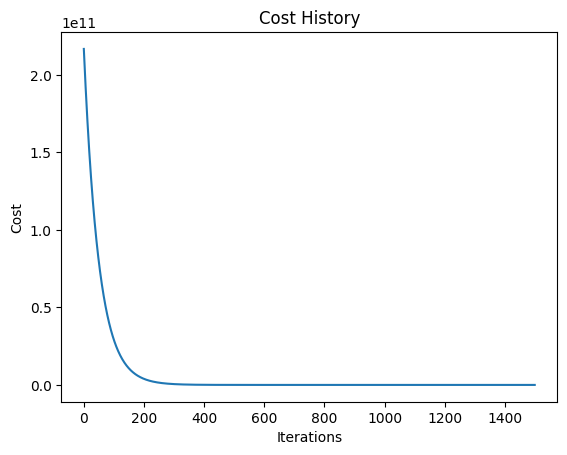

In [8]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

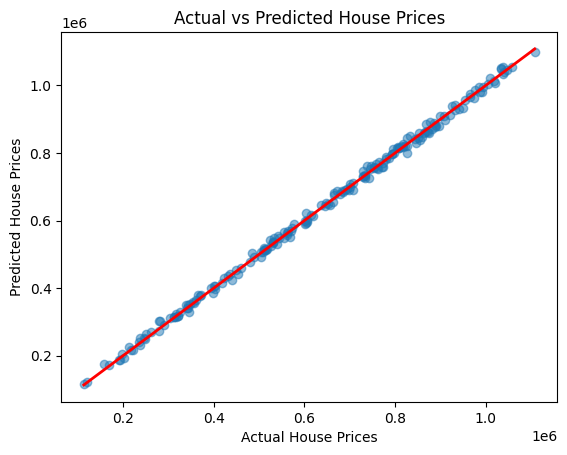

In [9]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Ideal line
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

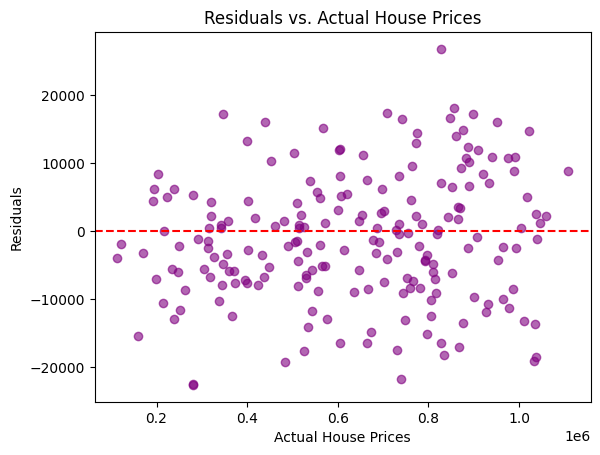

In [10]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color="purple", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Actual House Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs. Actual House Prices")
plt.show()